In [1]:
!pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 1.6MB 9.0MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 133kB 18.8MB/s 
     |████████████████████████████████| 63.9MB 54kB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 1.2MB 45.5MB/s 
     |████████████████████████████████| 389kB 42.7MB/s 
     |████████████████████████████████| 3.1MB 44.4MB/s 
     |████████████████████████████████| 266kB 37.3MB/s 
     |████████████████████████████████| 7.0MB 44.5MB/s 
     |████████████████████████████████| 71kB 1.4MB/s 
     |████████████████████████████████| 552kB 47.0MB/s 
     |████████████████████████████████| 235kB 42.6MB/s 
     |████████████████████████████████| 604kB 40.6MB/s 
     |████████████████████████████████| 2.1MB 43.6MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
   

In [0]:
import pandas as pd
from pycaret.classification import *

In [0]:
url = 'https://raw.githubusercontent.com/nukemecha/Project3/master/tosh/data/loans_2011.csv'
df = pd.read_csv(url)

In [0]:
df=df.replace(to_replace="Fully Paid",value= 1)
df=df.replace(to_replace="Charged Off",value= 0)
df=df.replace(to_replace="Current", value = 1)
df=df.replace(to_replace="Default",value= 0)
df=df.replace(to_replace="Late (31-120 days)",value= 0)
df=df.replace(to_replace="In Grace Period",value= 0)
df=df.replace(to_replace="Late (16-30 days)",value= 0)

In [0]:
predata_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',\
       'loan_status','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',\
       'pub_rec', 'revol_util', 'total_acc']

In [0]:
df2 = pd.DataFrame()

In [0]:
df2 = df[predata_columns]

In [13]:
df2

,loan_amnt,term,int_rate,installment,grade,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,36 months,10.65,162.87,B,1,27.65,0,1,3,0,83.7,9
1,2500,60 months,15.27,59.83,C,0,1.00,0,5,3,0,9.4,4
2,2400,36 months,15.96,84.33,C,1,8.72,0,2,2,0,98.5,10
3,10000,36 months,13.49,339.31,C,1,20.00,0,1,10,0,21.0,37
4,3000,60 months,12.69,67.79,B,1,17.94,0,0,15,0,53.9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21716,24250,60 months,17.43,473.47,E,1,16.35,0,1,7,1,93.5,10
21717,12000,36 months,5.42,361.92,A,1,7.70,0,0,6,0,10.1,14
21718,12000,60 months,9.99,254.91,B,1,3.33,0,0,4,0,4.6,13
21719,2500,36 months,5.79,75.82,A,0,14.70,0,1,10,0,18.4,26


In [14]:
exp_clf = setup(df2, target = 'loan_status')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,440
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(21721, 13)"
4,Missing Values,True
5,Numeric Features,7
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8475,0.5815,0.9977,0.8489,0.9173,0.0106
1,0.8494,0.5788,1.0000,0.8492,0.9185,0.0146
2,0.8475,0.5419,0.9984,0.8485,0.9174,0.0047
3,0.8455,0.5640,0.9969,0.8477,0.9163,-0.0052
4,0.8487,0.5652,0.9977,0.8501,0.9180,0.0179
5,0.8480,0.5808,0.9992,0.8486,0.9178,-0.0013
6,0.8474,0.6073,0.9992,0.8479,0.9174,-0.0013
7,0.8461,0.5502,0.9961,0.8486,0.9165,0.0079
8,0.8447,0.5550,0.9953,0.8480,0.9158,-0.0005
9,0.8474,0.5870,0.9992,0.8479,0.9174,-0.0013


In [16]:
pred_holdout = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.847,0.5726,0.9986,0.848,0.9172,-0.0007


In [17]:
pred_holdout

,loan_amnt,int_rate,installment,dti,open_acc,revol_util,total_acc,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,delinq_2yrs_0,delinq_2yrs_1,delinq_2yrs_11,delinq_2yrs_2,delinq_2yrs_3,delinq_2yrs_4,delinq_2yrs_5,delinq_2yrs_6,delinq_2yrs_7,delinq_2yrs_8,delinq_2yrs_9,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,inq_last_6mths_4,inq_last_6mths_5,inq_last_6mths_6,inq_last_6mths_7,inq_last_6mths_8,pub_rec_0,pub_rec_1,pub_rec_2,pub_rec_3,loan_status,Label,Score
0,15000.0,13.49,508.96,7.83,8.0,54.8,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8510
1,20000.0,11.71,661.52,16.55,6.0,84.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8847
2,11000.0,6.92,339.25,0.48,4.0,14.3,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7909
3,4850.0,6.62,148.92,11.19,5.0,17.7,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7696
4,3500.0,11.99,116.24,7.01,6.0,79.4,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,10000.0,9.91,322.25,10.17,14.0,33.5,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9152
6513,6000.0,11.49,197.83,6.84,8.0,39.5,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8428
6514,9600.0,5.42,289.54,21.13,6.0,6.9,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8101
6515,15000.0,16.02,364.94,10.62,6.0,16.2,30.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.6572


In [0]:
final_lr = finalize_model(lr)

In [21]:
save_model(final_lr, 'lr_final_model')

Transformation Pipeline and Model Succesfully Saved


In [0]:
from google.colab import files
files.download('lr_final_model.pkl')

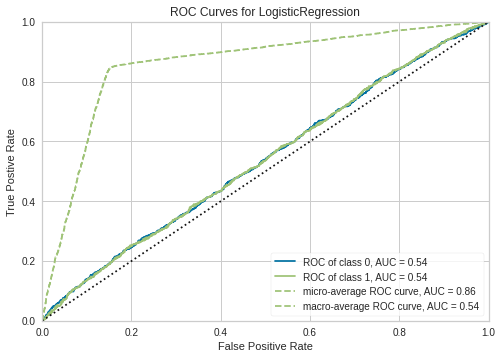

In [23]:
plot_model(final_lr, plot = 'auc')